# Example: AutoML
-----------------

This example shows how to use atom's AutoML implementation to automatically search for an optimized pipeline.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=6, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 6 cores.

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 141.24 kB
Scaled: False
Outlier values: 167 (1.2%)



In [4]:
# It's possible to add custom estimators to the pipeline
atom.add(StandardScaler())

Adding StandardScaler to the pipeline...
Fitting StandardScaler...


In [5]:
# Check that the scaling worked
atom.scaled

True

In [6]:
# Find an optimized pipeline using AutoML
atom.automl(objective="precision", max_time=2 * 60)

Searching for optimal pipeline...
AutoMLSearch will use the holdout set to score and rank pipelines.
Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Precision. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Will stop searching for new pipelines after 120 seconds.

Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Precision: 0.000
	Starting holdout set scoring
	Finished holdout set scoring - Precision: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Precision: 1.000
	Starting holdout set scoring
	Finished holdout set scoring - Precision: 1.000
Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Precision: 1.000
	Starting holdout set scoring
	Finished holdout set scoring - Precision: 1.000
XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer:
	Starting cr

## Analyze the results

In [7]:
# The evalml estimator can be accessed for further analysis
atom.evalml

In [8]:
# Check the new transformers in the branch
atom.branch.status()

Branch: master
 --> Pipeline: 
   --> StandardScaler
   --> LabelEncoder
   --> ReplaceNullableTypes
   --> Imputer
   --> StandardScaler
 --> Models: LR


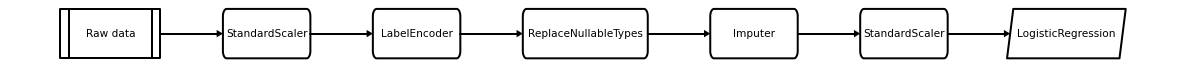

In [9]:
# Or draw the pipeline
atom.plot_pipeline()

In [10]:
# Note that the model is also merged with atom
atom.lr

LogisticRegression(C=1.9835334708679646, l1_ratio=0.2896296405458125, n_jobs=6,
                   penalty='elasticnet', random_state=1, solver='saga')

In [11]:
# The pipeline can be exported to a sklearn-like pipeline
atom.export_pipeline(model="lr")

Pipeline(memory=Memory(location=None),
         steps=[('standardscaler', StandardScaler()),
                ('labelencoder', LabelEncoder(positive_label=None)),
                ('replacenullabletypes', ReplaceNullableTypes()),
                ('imputer',
                 Imputer(categorical_impute_strategy='most_frequent', numeric_impute_strategy='most_frequent', boolean_impute_strategy='most_frequent', categorical_fill_value=None, numeric_fill_value=None, boolean_fill_value=None)),
                ('standardscaler2', StandardScaler()),
                ('LR',
                 LogisticRegression(C=1.9835334708679646,
                                    l1_ratio=0.2896296405458125, n_jobs=6,
                                    penalty='elasticnet', random_state=1,
                                    solver='saga'))])